In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import matplotlib as mlp
import warnings

# plt.style.use('dark_background')

mlp.rcParams['lines.linewidth'] = 2

mlp.rcParams['xtick.major.size'] = 12
mlp.rcParams['xtick.major.width'] = 2
mlp.rcParams['xtick.labelsize'] = 10
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 12
mlp.rcParams['ytick.major.width'] = 2
mlp.rcParams['ytick.labelsize'] = 10
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 10
mlp.rcParams['axes.titlesize'] = 16
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

warnings.filterwarnings('ignore')


In [2]:
import seaborn as sns
from sklearn.datasets import make_moons

def generate_moons_data(n_samples=1000, noise=0.5, random_state=None):
    """
    Генерирует синтетические данные в форме двух полумесяцев.

    Параметры:
        n_samples : int, необязательный
            Число образцов (по умолчанию 1000).
        noise : float, необязательный
            Уровень шума в данных (по умолчанию 0.5).
        random_state : int или RandomState, необязательный
            Состояние генератора случайных чисел (по умолчанию None).

    Возвращает:
        DataFrame
            Данные в формате DataFrame с признаками "x1" и "x2" и целевой переменной "y".
    """
    # Генерация данных с помощью make_moons
    dataset = make_moons(n_samples=n_samples, noise=noise, random_state=random_state)

    # Преобразование данных в DataFrame
    dataset = pd.DataFrame(np.hstack((dataset[0], dataset[1].reshape(-1, 1))),
                           columns=["x1", "x2", "y"])

    return dataset

def plot_moons_data(dataset):
    """
    Визуализирует синтетические данные в форме двух полумесяцев.

    Параметры:
        dataset : DataFrame
            Данные в формате DataFrame с признаками "x1" и "x2" и целевой переменной "y".
    """
    # Создание нового графика
    fig = plt.figure(figsize=(10, 6))

    # Рассеяние данных с использованием seaborn
    sns.scatterplot(
        x="x1",
        y="x2",
        hue="y",
        edgecolor="k",
        data=dataset
    )

    plt.show()

import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, pixel_step=0.02):
    """
    Визуализирует границу решения для модели классификации на основе дерева решений.

    Параметры:
        model : обученная модель классификации (дерево решений)
        X : признаки (данные)
        y : метки классов
        pixel_step : шаг для генерации точек на плоскости (по умолчанию 0.02)
    """
    # Создание нового графика
    fig = plt.figure(figsize=(16, 10))
    
    # Вычисление границ признакового пространства
    x1_min, x1_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
    x2_min, x2_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1

    # Генерация точек на плоскости
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, pixel_step),
        np.arange(x2_min, x2_max, pixel_step)
    )

    # Прогнозирование классов для каждой точки на плоскости
    Z = model.predict(pd.DataFrame(np.c_[xx1.ravel(), xx2.ravel()],
                              columns=["x1", "x2"]))

    Z = Z.reshape(xx1.shape)

    # Заполнение пространства контурами, отображающими прогнозы модели
    cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.Paired)

    plt.axis("tight")

    # Отображение точек данных для каждого класса и обученных областей
    for i, n, c in zip(range(2), model.classes_, ["#FF5533", "#00B050"]):
        idx = np.where(y == i)
        plt.scatter(
            X.values[idx, 0],
            X.values[idx, 1],
            c=c,
            s=20,
            edgecolor="k",
            label="Class %s" % n,
        )
    
    # Установка пределов осей и добавление подписей
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.legend(loc="upper right")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Decision Boundary")
    plt.show()


from sklearn.tree import plot_tree

def plot_decision_tree(decision_tree, feature_names, class_names):
    """
    Визуализирует дерево решений в виде графа.

    Параметры:
        decision_tree : обученная модель дерева решений
        feature_names : list
            Список названий признаков.
        class_names : list
            Список названий классов.
    """
    fig = plt.figure(figsize=(16, 10))

    plot_tree(
        decision_tree,
        feature_names=feature_names,
        class_names=class_names,
        filled=True
    )

    plt.show()

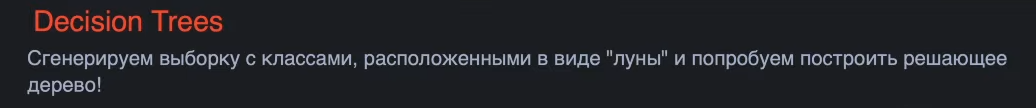

In [3]:
from sklearn.datasets import make_moons

dataset = make_moons(
    n_samples=1000,
    noise=0.5,
    random_state=0
)

dataset = pd.DataFrame(np.hstack((dataset[0], dataset[1].reshape(-1, 1))), 
                       columns=["x1", "x2", "y"])

dataset.head()

,x1,x2,y
0,2.216430,0.741684,1.0
1,2.057427,0.424853,1.0
2,-0.116847,0.004159,0.0
3,-0.710797,0.210482,1.0
4,0.267548,-0.460654,1.0


In [4]:
dataset.groupby("y").size()

y
0.0    500
1.0    500
dtype: int64

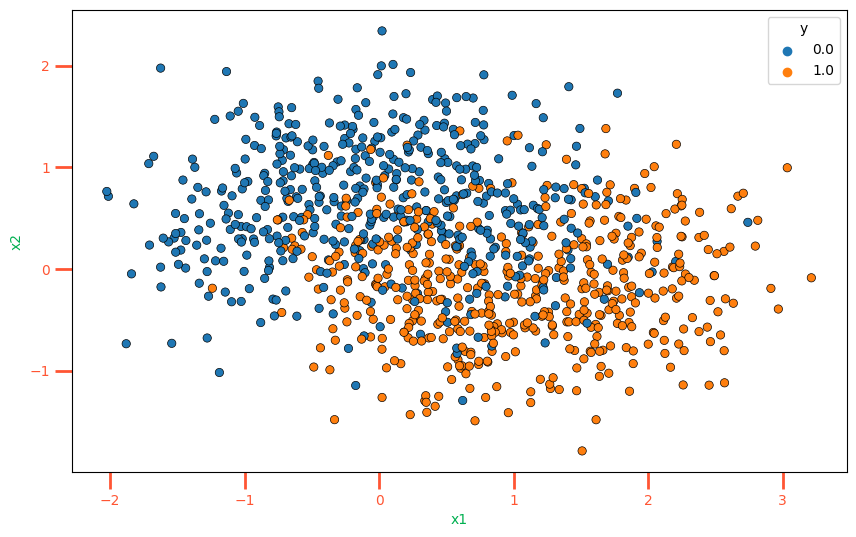

In [5]:
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(10, 6)

sns.scatterplot(
        x="x1",
        y="x2",
        hue="y",
        edgecolor="k", 
        data=dataset
)


plt.show()

In [6]:
from sklearn.tree import DecisionTreeClassifier

X = dataset.drop("y", axis=1)
y = dataset['y']

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X, y)

DecisionTreeClassifier()

In [7]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y, decision_tree.predict(X)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       500
         1.0       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



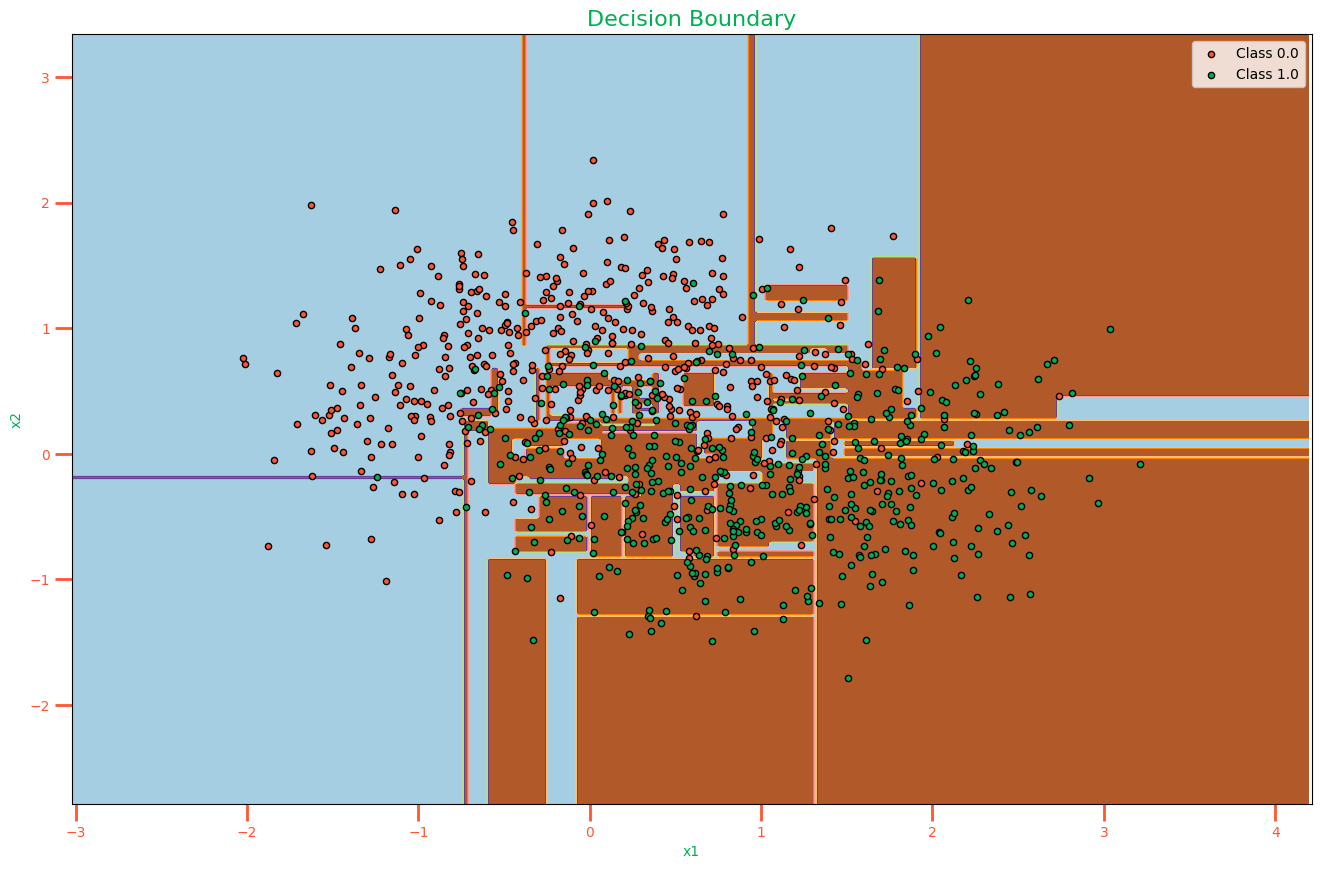

In [8]:
plot_decision_boundary(decision_tree, X, y)

# Посмотрим как модель переобучилась на новых данных 

,x1,x2,y
0,1.999287,0.462234,1.0
1,1.636065,-0.271636,1.0
2,-0.300622,0.953743,0.0
3,0.055155,0.172481,1.0
4,0.531208,-0.383309,1.0


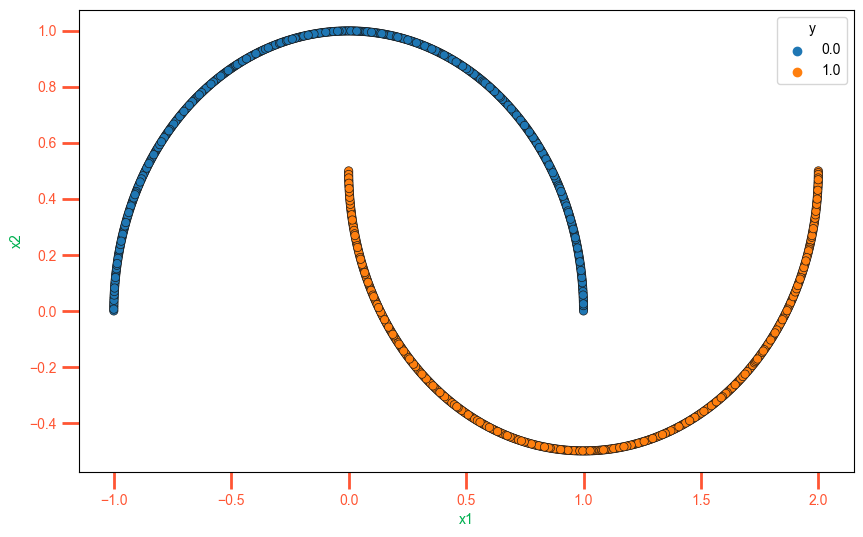

None

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       500
         1.0       0.85      0.86      0.85       500

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



None

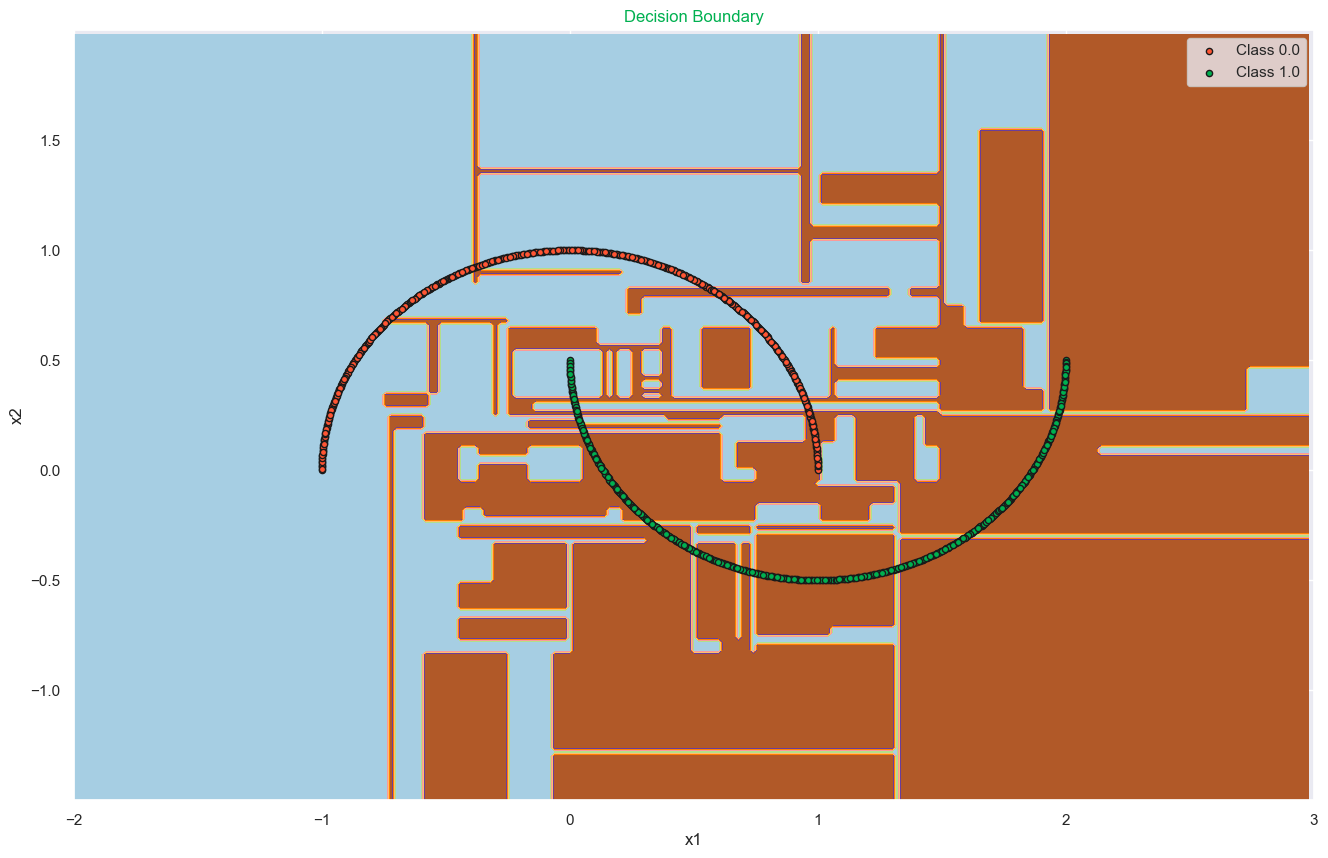

In [9]:
dataset_2 = make_moons(
    n_samples=1000,
    noise=0,
    random_state=0
)

dataset_2 = pd.DataFrame(np.hstack((dataset_2[0], dataset_2[1].reshape(-1, 1))), 
                       columns=["x1", "x2", "y"])

display(dataset_2.head())



fig = plt.figure()

fig.set_size_inches(10, 6)

sns.scatterplot(
        x="x1",
        y="x2",
        hue="y",
        edgecolor="k", 
        data=dataset_2
)

sns.set()

display(plt.show())


X_2 = dataset_2.drop("y", axis=1)
y_2 = dataset_2['y']

display(print(classification_report(y_2, decision_tree.predict(X_2))))

# Визуализируем границы решения

plot_decision_boundary(decision_tree, X_2, y_2)

### Перебор гиперпараметров

In [10]:
### Два основных гипер-параметра у дерева решений:
# 1) max_depth: максимальная глубина дерева решения 
# 2) min_samples_leaf: минимальное кол-во объектов, которые должны находится в финальных листовых решениях 


decision_tree = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=5
)

decision_tree.fit(X, y)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       500
         1.0       0.85      0.83      0.84       500

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



None

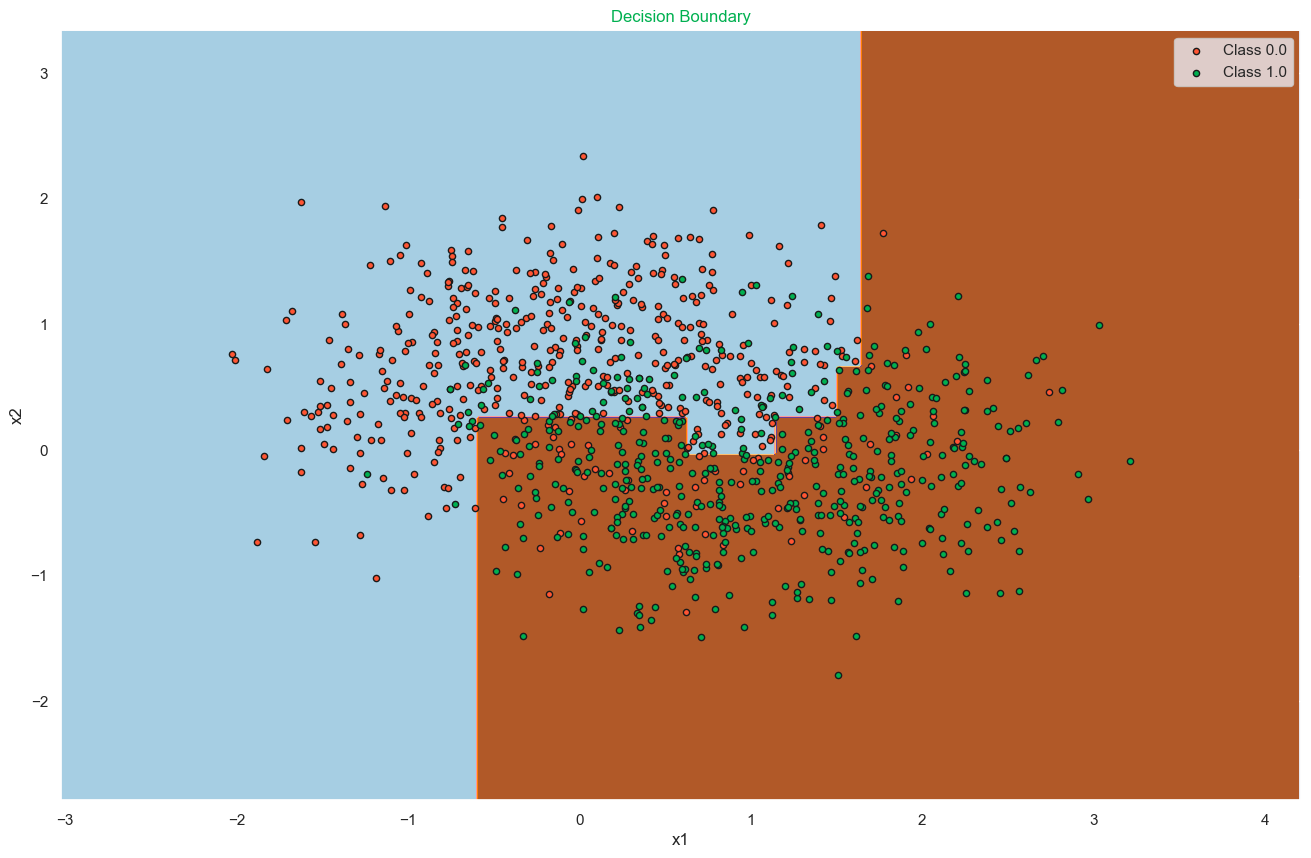

In [11]:
display(print(classification_report(y, decision_tree.predict(X))))

# Визуализируем границы решения

plot_decision_boundary(decision_tree, X, y)

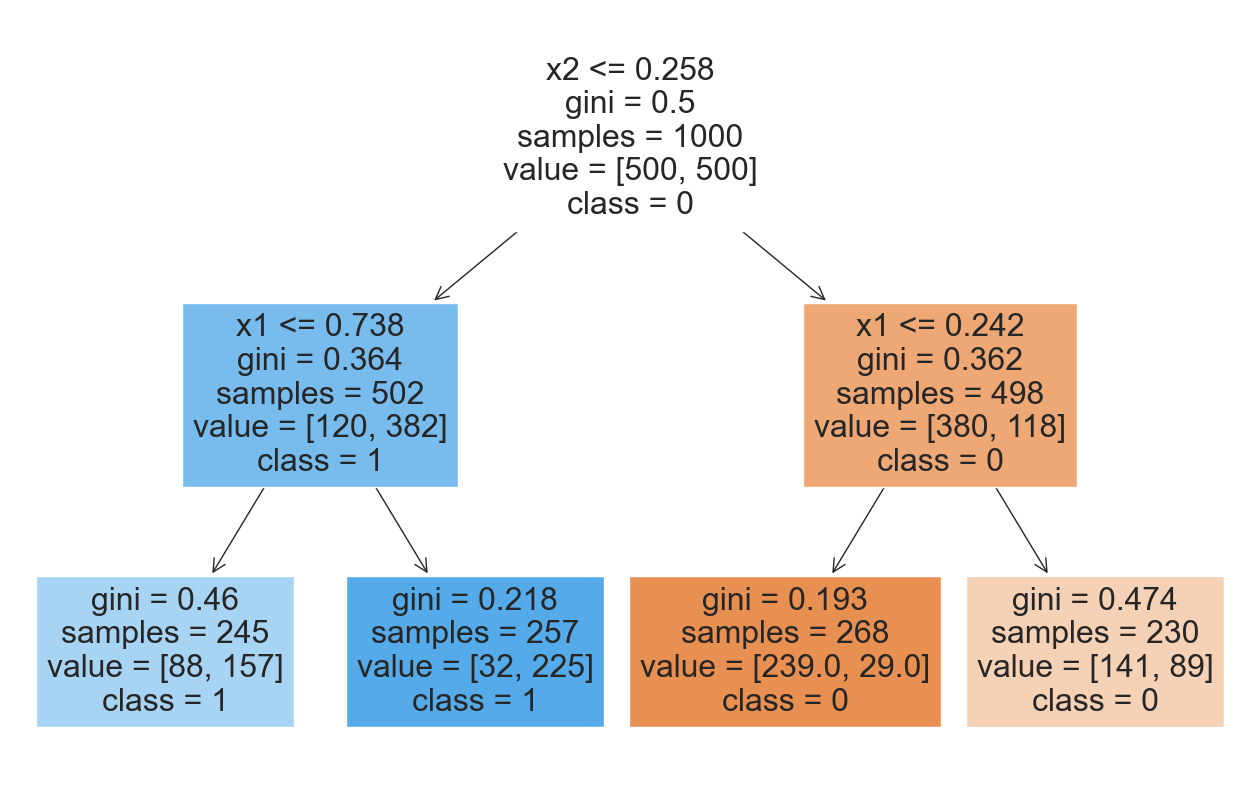

In [12]:
### Изобразим дерево в виде графа 

from sklearn import tree

decision_tree = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=200
)

decision_tree.fit(X, y)

plot_decision_tree(decision_tree, X.columns, decision_tree.classes_.astype(int).astype(str))

### Проверим дерево решений на отложенной выборке 

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state=0,
    test_size=0.2
)

decision_tree = DecisionTreeClassifier(
    max_depth=100,
    min_samples_leaf=1
)

decision_tree.fit(X_train, y_train)

display(print(classification_report(y_test, decision_tree.predict(X_test))))

display(
    f"Accuracy на трейне: {sum(y_train == decision_tree.predict(X_train)) / X_train.shape[0]}"
)

display(
    f"Accuracy на тесте: {sum(y_test == decision_tree.predict(X_test)) / X_test.shape[0]}"
)

              precision    recall  f1-score   support

         0.0       0.65      0.75      0.70        92
         1.0       0.76      0.66      0.70       108

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



None

'Accuracy на трейне: 1.0'

'Accuracy на тесте: 0.7'

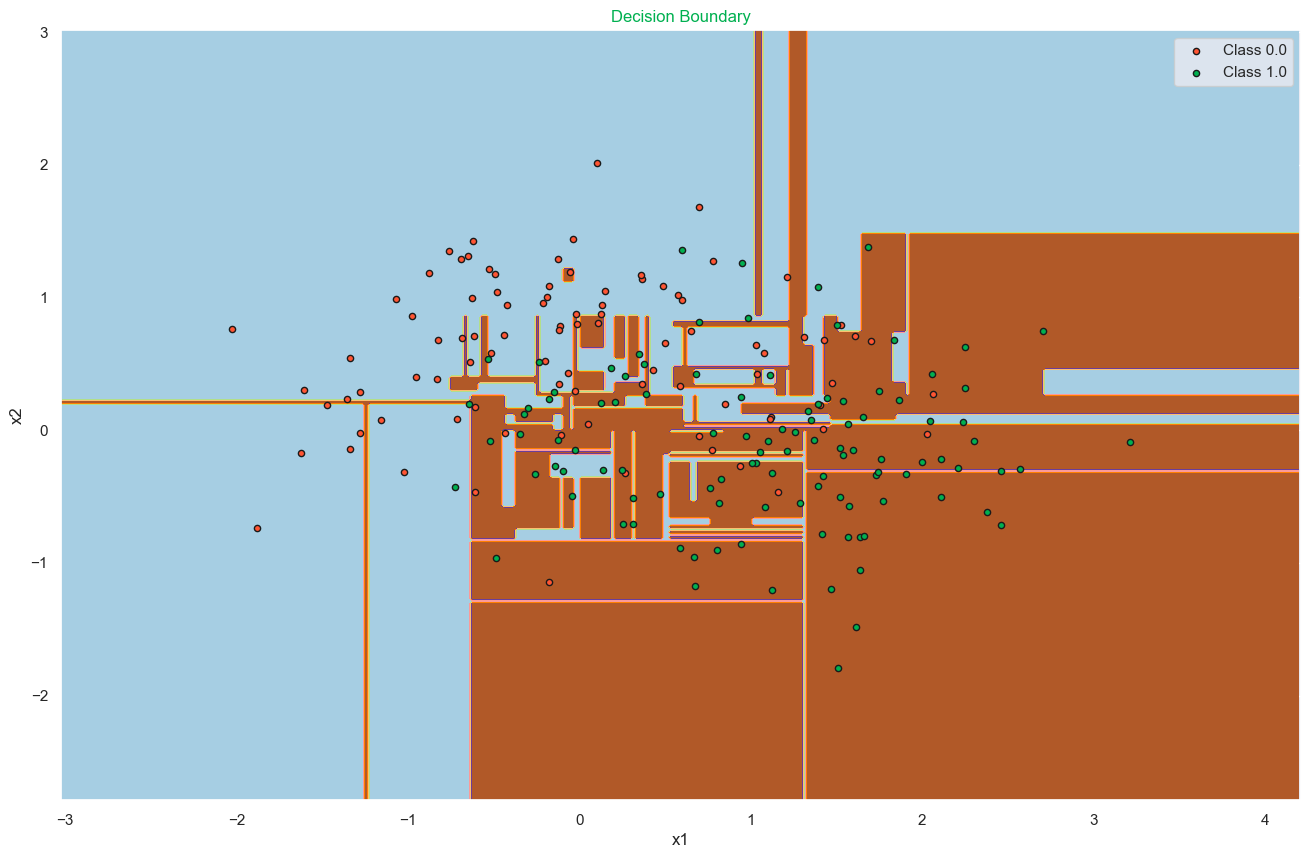

In [14]:
### Вычислим границы признаквого пространства

plot_decision_boundary(decision_tree, X_test, y_test)


### Добавить нелинейность для высичления границ признаквого пространства 

Пусть имели 2 признака: $x_1$, $x_2$, описывающие Сумму кредита и Возраст клиента соответственно, и выделили из них один общий признак: $d^{new} = 2x_1^3 - 3x_1^2 - x_1 - x_2$

Попробуем построить модель решающего дерева на таком новом признаке.

Для этого нам придется подбирать лучшие пороги `t` для нового предиката  $[d^{new} <= t]$

Положим, выбрали $t^* = 3$. Как такой предикат разделит изначальное пространство базовых признаков?

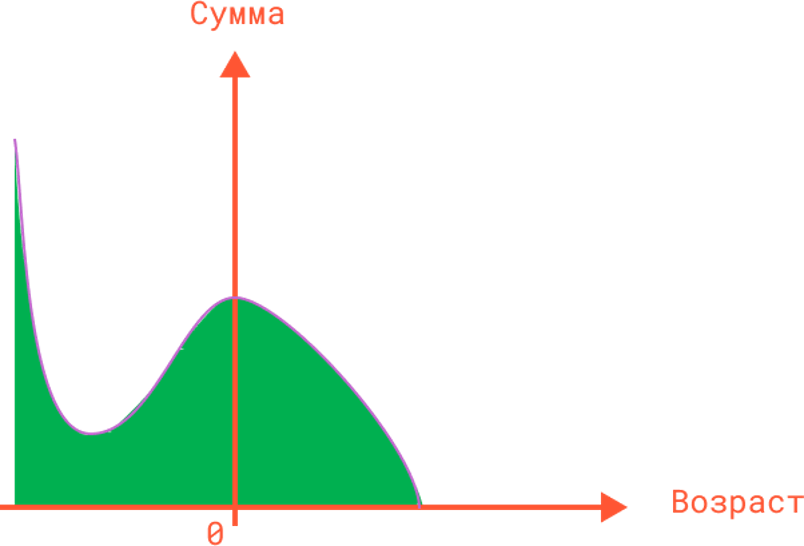

Таким образом, во время строительства дерева можно придумывать какие-то нелинейные комбинации базовых признаков, тогда полученные разбиения могут иметь нелинейную форму!

In [15]:
def new_feature(x1, x2):

    return 2*x1**3 - 3*x2**2 - x1 - x2

X_new = X.copy()

X_new['new_feature'] = new_feature(X.values[:, 0], X.values[:, 1])

X_new.head()

,x1,x2,new_feature
0,2.216430,0.741684,17.168304
1,2.057427,0.424853,14.394410
2,-0.116847,0.004159,0.109445
3,-0.710797,0.210482,-0.350830
4,0.267548,-0.460654,-0.405197


Вместо того, чтобы ручками менять датасеты каждый раз, когда хотим обучить модель с новой фичей, можно ее создание добавить в `Pipeline`!

Для этого в начале создадим свой кастомный класс-трансформер `CustomFunctionTransformer`

Чтобы шаг с трансформацией данных плавно вошел в `Pipeline`, будем требовать наличие следующих методов:

1. `fit`
2. `transform`
3. `fit_transform`

Если унаследоваться от классов `BaseEstimator` и `TransformerMixin` из `sklearn.base`, то можно будет опустить третий метод, оставив только `fit` и `transform`, а так же будут доступны некоторые уже встроенные радости: например, методы `get_params` и т.д.

Пусть наш трансфоормер делает следующее: берет название двух колонок `first_col` и `second_col`, а потом применяет к ним некоторую кастомную функцию `function`, результат запишем в колонку `new_feature`.

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        print("Инициализировали класс!")
        
    def fit(self, X, y=None):
        print("Зафитили датасет!")
        return self
    
    def transform(self, X, y=None):
        
        X_ = X.copy()
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis=1)
        
        print("Трансформировали датасет!")
        return X_

In [17]:
custom_class = CustomFunctionTransformer(
    "x1",
    "x2",
    lambda x, y: 2*x**3 - 3*x**2 - x - y
)

custom_class.fit(X)

custom_class.transform(X)

Инициализировали класс!
Зафитили датасет!
Трансформировали датасет!


,new_feature
0,4.080901
1,2.236898
2,0.068537
3,-1.733619
4,0.016663
...,...
995,-1.345270
996,-1.256273
997,0.394222
998,-0.610251


In [18]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("custom_transformer",
    CustomFunctionTransformer(
        "x1",
        "x2",
        lambda x, y: 2*x**3 - 2*x**2 - x - y
    )),
    ("decision_tree", DecisionTreeClassifier(max_depth=2))
])

pipe.fit(X, y)

Инициализировали класс!
Зафитили датасет!
Трансформировали датасет!


Pipeline(steps=[('custom_transformer',
                 CustomFunctionTransformer(first_col='x1',
                                           function=<function <lambda> at 0x00000178CFF31120>,
                                           second_col='x2')),
                ('decision_tree', DecisionTreeClassifier(max_depth=2))])

Трансформировали датасет!


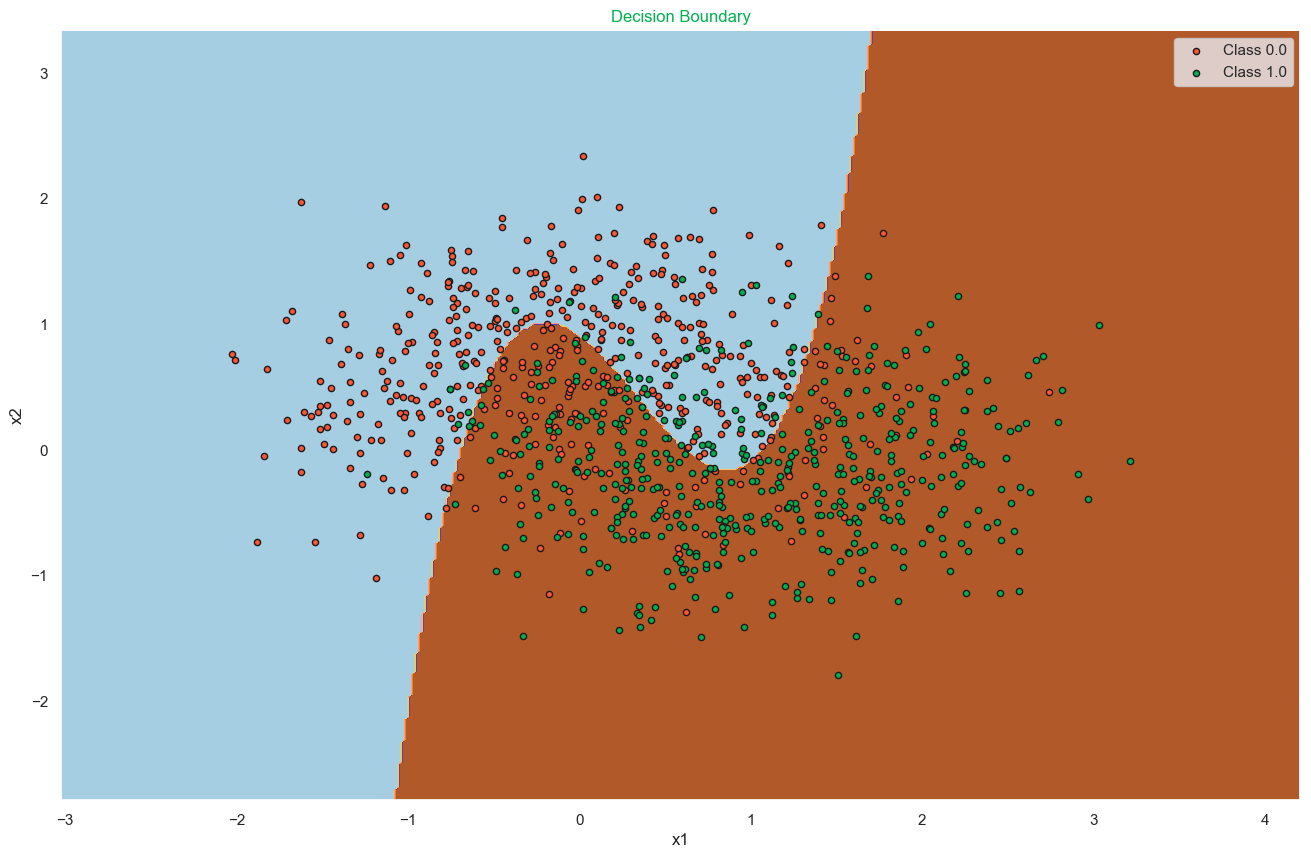

None

Трансформировали датасет!
              precision    recall  f1-score   support

         0.0       0.86      0.71      0.78       500
         1.0       0.75      0.88      0.81       500

    accuracy                           0.80      1000
   macro avg       0.81      0.80      0.80      1000
weighted avg       0.81      0.80      0.80      1000



None

In [19]:
### Вычислим границы признаквого пространства

display(plot_decision_boundary(pipe, X, y))

display(print(classification_report(y, pipe.predict(X))))

## Попробуем луны без шума 

Инициализировали класс!
Зафитили датасет!
Трансформировали датасет!
Трансформировали датасет!


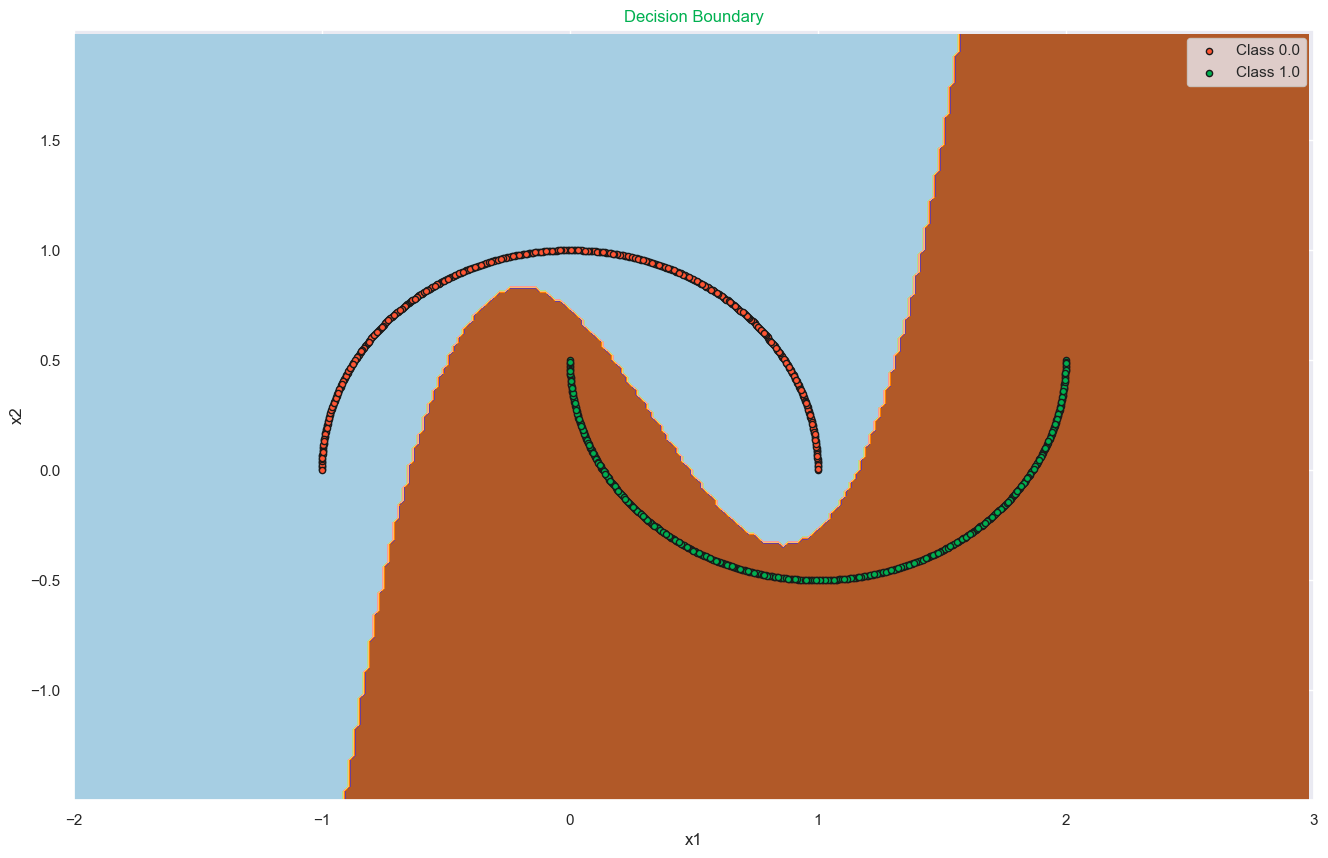

In [20]:
df = generate_moons_data(noise=0)

X_new = df.drop("y", axis=1)
y_new = df["y"]

pipe_new = Pipeline([
    ("custom_transformer",
    CustomFunctionTransformer(
        "x1",
        "x2",
        lambda x, y: 2*x**3 - 2*x**2 - x - y
    )),
    ("decision_tree", DecisionTreeClassifier(max_depth=2))
])

pipe_new.fit(X_new, y_new)

### Вычислим границы признаквого пространства

plot_decision_boundary(pipe_new, X_new, y_new)

In [21]:
print(classification_report(y_new, pipe_new.predict(X_new)))

Трансформировали датасет!
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       500
         1.0       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

